# Udacity Data Wrangling Project

BY Lydia Fang

Feb.17,2019

# Gathering 

##### Read twitter archive data

In [1]:
## read the twitter archive data
import pandas as pd
import json
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

 ##### Download image-prediction.tsv files

In [60]:
## download the images data
import requests
import os
# Make directory if it doesn't already exist
folder_name = '.'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get (url)
with open (os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [2]:
## read the tsv file
image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')

##### Tweepy API data download

In [18]:
# import the API tools
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'KEY'
consumer_secret = 'SECRET'
access_token = 'TOKEN'
access_secret = 'SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth,wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

# Twitter query using tweet_id from the twitter_df

tweet_ids = twitter_df.tweet_id.values
tweet_data = {}
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)
        tweet_data[str(tweet_id)] = tweet._json
    except:
        print ("Error for:" + str(tweet_id))

Error for:888202515573088257
Error for:873697596434513921
Error for:872668790621863937
Error for:869988702071779329
Error for:866816280283807744
Error for:861769973181624320
Error for:845459076796616705
Error for:842892208864923648
Error for:837012587749474308
Error for:827228250799742977
Error for:812747805718642688
Error for:802247111496568832
Error for:775096608509886464
Error for:770743923962707968
Error for:754011816964026368


Rate limit reached. Sleeping for: 382


Error for:696490539101908992
Error for:680055455951884288


Rate limit reached. Sleeping for: 386


In [19]:
with open('tweet_json.txt', 'w') as outfile: 
    json.dump(tweet_data, outfile,sort_keys=True, indent =4, ensure_ascii = False)

In [3]:
tweets_info = pd.read_json('tweet_json.txt', orient = 'index')

In [4]:
# Keep the interested volumns and drop others
retweet_fav = tweets_info[['id','favorite_count','retweet_count']].reset_index()
retweet_fav=retweet_fav.drop(['index'],axis=1)

# Assessing

### 1. Visually check all three dataframe

In [5]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
retweet_fav

,id,favorite_count,retweet_count
0,666020888022790144,2532,498
1,666029285002620928,126,46
2,666033412701032448,123,43
3,666044226329800704,292,136
4,666049248165822464,106,42
5,666050758794694656,130,57
6,666051853826850816,1196,831
7,666055525042405376,428,235
8,666057090499244032,289,138
9,666058600524156928,109,57


### 2. Programtically check the over all info of three dataframes

#### Twitter_df data

In [8]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_df.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
Daisy            7
Toby             7
an               7
Buddy            7
Bailey           7
Jax              6
Bella            6
Jack             6
Rusty            6
Milo             6
Dave             6
Scout            6
Leo              6
Stanley          6
Koda             6
Oscar            6
Finn             5
              ... 
Caryl            1
Zeek             1
Dobby            1
Freddery         1
infuriating      1
Schnitzel        1
Emma             1
Trip             1
Ralphus          1
Norman           1
Adele            1
Koko             1
Tom              1
Lacy             1
Peanut           1
Mimosa           1
Tedders          1
Simba            1
Remus            1
Durg             1
Bobbay           1
Stuart      

In [11]:
## check the rating_denominator values
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
## check the rating_numerator values
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
twitter_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### image_predictions data

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Commemnts: No missing value. Good!
All data types are correct

In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
retweet_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id                2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Quality issues:

##### Twitter_df dataframe

1.retweeted ratings are included in the dataframe

2.Some expanded_urls are missing, and this column could be removed.

3.A large number of dogs do not have the dog stage information. (will consider if this information is really needed).Dog stages can be catogerized into one column

4.Many dogs have no name (745). Some names are not names.

5.some rating_denominator is not 10.

6.Some extreme rating_numerator must be wrong

7.timestamp type is not date type

##### image_prediction dataframe

8.some images are not dogs

9.the "id" in the retweet_fac dataframe should be changed into "tweet_id"

### Tidiness issues:

##### Twitter_df dataframe

1.unnecessary information (e.g.expanded_url.)

2.source can be catogerize into a more clear column (i.e.iphone, web, vine, Tweetdeck)

3.Dog stages can be catogerized into one column


##### image_predictions dataframe

4.image number information is not necessary, can be removed

5.image_predictions shoule be merged with twitter_df dataframe




# cleaning

In [20]:
### Copy all dataframes

twitter_df_clean = twitter_df.copy()
image_predictions_clean = image_predictions.copy()
retweet_fav_clean = retweet_fav.copy()

### Twitter_df Data Frame cleaning

#### Quality issue 1: Retweet ratings are included in the table.

#### Quality issue 2: some expanded_urls are missing, and this column can be removed

#### Tidiness issue1: unuseful information is included in the table (e.g. expanded_urls)

#### Define: Remove all Retweet rows, and drop the retweet_id, in_reply_id, expanded_urls columns

#### code

In [21]:
# remove retweeted_status_id that is not null
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_id.isnull()]
# remove in_reply_id that is not null
twitter_df_clean = twitter_df_clean[twitter_df_clean.in_reply_to_status_id.isnull()]

#### Test

In [22]:
twitter_df_clean.shape

(2097, 17)

In [23]:
### remove in_reply_to_user_id,in_reply_to_status_id,retweeted_status_id,expanded_urls etc. rows
twitter_df_clean = twitter_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'
                                          ,'retweeted_status_timestamp','expanded_urls'],axis=1)
twitter_df_clean.shape


(2097, 11)

#### Tidiness issue 2: source can be categorize into a more clear column
#### Define: categorize the source into a new column (source_new) using function

#### Code

In [24]:
twitter_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
### categorize the source to a more clear column

def category (a):
    if 'iphone' in a:
        return "iphone"
    if 'Web' in a:
        return "web"
    if 'Vine' in a:
        return "Vine"
    if "TweetDeck" in a:
        return "TweetDeck"
twitter_df_clean['source_new']=twitter_df_clean.apply(lambda x: category(x.source),axis=1)

#### Test

In [26]:
twitter_df_clean.source_new.unique()

array(['iphone', 'web', 'Vine', 'TweetDeck'], dtype=object)

In [27]:
twitter_df_clean.source_new.value_counts()

iphone       1964
Vine           91
web            31
TweetDeck      11
Name: source_new, dtype: int64

In [28]:
twitter_df_clean = twitter_df_clean.drop(['source'],axis=1)

In [29]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
source_new            2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


#### Quality issue 3 & Tidiness issue 3:A large number of dogs have no stage, and  Dog stages could be categorized into one column
#### Define: Using function to re-categize the dog stages information

#### Code

In [30]:
# re-categorize the four dog stages columns into one column and delete the original four dog stage columns
def stage(s,d,f,g):
    if s == 'doggo':
        return 'doggo'
    if d == 'floofer':
        return 'floofer'
    if f == 'pupper':
        return 'pupper'
    if g == 'puppo':
        return 'puppo'
    else:
        return 'None'
twitter_df_clean['dog_stage']=twitter_df_clean.apply(lambda x: stage(x.doggo,x.floofer,x.pupper,x.puppo),axis=1)

In [31]:
# check value number
twitter_df_clean.dog_stage.value_counts()

None       1761
pupper      221
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [32]:
# remove the four original dog_stage columns
twitter_df_clean = twitter_df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [33]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
source_new            2097 non-null object
dog_stage             2097 non-null object
dtypes: int64(3), object(5)
memory usage: 147.4+ KB


#### Quality issue 4: Some dogs have no name, some dogs' names are acyually not name
#### Define: This issue does not influence the analyses too much, but to be consistent, replace all "non-name" (i.e. a, the, an, Bo) to "None"

In [34]:
twitter_df_clean.name.value_counts()

None       603
a           55
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         8
the          8
Daisy        7
Toby         7
Oscar        6
Koda         6
Bo           6
Bella        6
Stanley      6
Jax          6
Bailey       6
an           6
Dave         5
Milo         5
Louis        5
Scout        5
Leo          5
Buddy        5
Bentley      5
Chester      5
          ... 
Rambo        1
Sephie       1
Astrid       1
Mac          1
Gòrdón       1
JD           1
Monty        1
Rover        1
Rose         1
Dawn         1
life         1
Toffee       1
mad          1
Tonks        1
Marty        1
Olaf         1
Alfy         1
Ester        1
Mary         1
Davey        1
Karll        1
Ridley       1
Huck         1
Dug          1
Levi         1
Shiloh       1
Bell         1
Venti        1
Barclay      1
Stewie       1
Name: name, Length: 955, dtype: int64

In [35]:
not_name_list = ['a','the','an','Bo']
for i in not_name_list:
        twitter_df_clean['name'].replace(i, 'None', inplace=True)

#### Test

In [36]:
twitter_df_clean.name.value_counts()

None         678
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Koda           6
Bella          6
Jax            6
Bailey         6
Stanley        6
Oscar          6
Bentley        5
Leo            5
Scout          5
Buddy          5
Dave           5
Louis          5
Chester        5
Milo           5
Rusty          5
Gary           4
Maggie         4
Jeffrey        4
            ... 
Jeb            1
Rambo          1
Sephie         1
Astrid         1
JD             1
Barclay        1
Kathmandu      1
Venti          1
Willy          1
Monty          1
Rose           1
Dawn           1
life           1
Toffee         1
mad            1
Tonks          1
Marty          1
Olaf           1
Alfy           1
Ester          1
Mary           1
Davey          1
Karll          1
Ridley         1
Huck           1
Dug            1
Levi           1
Shiloh        

#### Quality issue 5: some rating_denominator is not 10

#### Define: Replace these numbers with 10

In [37]:
def replace_denomi(d):
    if d == 10:
        return d
    else:
        return 10
twitter_df_clean['rating_denominator']=twitter_df_clean.apply(lambda x: replace_denomi(x.rating_denominator),axis=1)

#### Test

In [38]:
twitter_df_clean[twitter_df_clean['rating_denominator']!=10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_new,dog_stage


#### Quality issue 6: some extreme rating_numerator could be wrong
#### Define: replace these values based on the text

#### Code

In [39]:
## filter out the ridiculous ratings to see if any rating can be corrected
wrong_numerator = twitter_df_clean[twitter_df_clean['rating_numerator']>15][['tweet_id','text','rating_numerator']]
wrong_numerator

,tweet_id,text,rating_numerator
433,820690176645140481,The floofs have been released I repeat the flo...,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27
902,758467244762497024,Why does this never happen at my front door......,165
979,749981277374128128,This is Atticus. He's quite simply America af....,1776
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80


In [40]:
# set the display colwitdth for seeing the entire text contents
pd.set_option('display.max_colwidth', -1)
wrong_numerator['text'].head

<bound method NDFrame.head of 433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                         
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq        
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
979     This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXw

comment: Well, it seems some of the ratings can be derived from the text.

index 695: 9.75/10

index 763: 11.27/10

index 1202: 11/10

index 1712: 11.26/10

In [41]:
# replace the above ratings with the actual ratings from the text
twitter_df_clean['rating_numerator'].loc[695] = 9.75
twitter_df_clean['rating_numerator'].loc[763] = 11.27
twitter_df_clean['rating_numerator'].loc[1202] = 11
twitter_df_clean['rating_numerator'].loc[1712] = 11.26

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Quality issue 7: timestamp type is not data type

#### Change the time stamp into date type

In [42]:
twitter_df_clean.timestamp = pd.to_datetime(twitter_df_clean['timestamp'])

In [43]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
source_new            2097 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 227.4+ KB


### image_prediction Data Frame cleaning

#### Tidiness issue 4: image number can be removed

In [44]:
image_predictions_clean = image_predictions_clean.drop(['img_num'],axis=1)

#### Quality issue 8: some images are not dogs
#### Define: filter out the non-dog images and remove those rows

#### Code

In [45]:
# filter out the non-dog images (i.e p1_dog, p2_dog & p3_dog are all False)
image_predictions_clean = image_predictions_clean[(image_predictions_clean['p1_dog']==True) | (image_predictions_clean['p2_dog']==True)
                                  | (image_predictions_clean['p3_dog']==True)]

#### Test

In [46]:
image_predictions_clean[(image_predictions_clean['p1_dog']==False) & (image_predictions_clean['p2_dog']==False)
                                  & (image_predictions_clean['p3_dog']==False)]

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Tidiness issue 5: image_prediction_clean data should be merged with twitter_df_clean dataframe
#### Define: Join the two dataframe, join on tweet_id

#### Code

In [47]:
twitter_image = pd.merge(twitter_df_clean,image_predictions_clean, how = 'inner')

In [48]:
twitter_image

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_new,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,iphone,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,iphone,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,iphone,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,iphone,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10,None,iphone,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
5,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10,Jax,iphone,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
6,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10,None,iphone,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
7,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10,Zoey,iphone,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
8,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10,Cassie,iphone,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
9,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,13.0,10,Koda,iphone,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


#### Test

In [49]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 18 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
text                  1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null int64
name                  1666 non-null object
source_new            1666 non-null object
dog_stage             1666 non-null object
jpg_url               1666 non-null object
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null bool
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null bool
p3                    1666 non-null object
p3_conf               1666 non-null float64
p3_dog                1666 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 213.1+ KB


### retweet_fav Dataframe cleaning

#### Quality issue 9: change the "id" into "tweet_id"

In [50]:
retweet_fav_clean = retweet_fav_clean.rename(columns = {'id':'tweet_id'})

In [51]:
retweet_fav_clean.head()

,tweet_id,favorite_count,retweet_count
0,666020888022790144,2532,498
1,666029285002620928,126,46
2,666033412701032448,123,43
3,666044226329800704,292,136
4,666049248165822464,106,42


#### Tidiness issue 5: All three dataframe need to be merged together

In [52]:
twitter_archive_master = pd.merge(twitter_image,retweet_fav_clean,how = 'inner')

In [53]:
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_new,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,iphone,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24523,4051
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,iphone,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41263,8414
2,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,iphone,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39441,9121
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10,None,iphone,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,19825,3034
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10,None,iphone,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,63962,18373


In [54]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1083
Data columns (total 20 columns):
tweet_id              1084 non-null int64
timestamp             1084 non-null datetime64[ns]
text                  1084 non-null object
rating_numerator      1084 non-null float64
rating_denominator    1084 non-null int64
name                  1084 non-null object
source_new            1084 non-null object
dog_stage             1084 non-null object
jpg_url               1084 non-null object
p1                    1084 non-null object
p1_conf               1084 non-null float64
p1_dog                1084 non-null bool
p2                    1084 non-null object
p2_conf               1084 non-null float64
p2_dog                1084 non-null bool
p3                    1084 non-null object
p3_conf               1084 non-null float64
p3_dog                1084 non-null bool
favorite_count        1084 non-null int64
retweet_count         1084 non-null int64
dtypes: bool(3), datetime64[ns]

# Save the dataframe into twitter_archive_master.csv

In [55]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

# Insights and Visualization

In [56]:
# First, I want to check the rating_numerator to exclude obvious outliers
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [57]:
# copy the data for further anayses
Analyze_df=twitter_archive_master.copy()

### 1. First, the "most" dogs

In [58]:
rate1 = Analyze_df.sort_values('favorite_count',ascending=False).head(1)
rate1

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_new,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
212,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13.0,10,Stephan,iphone,None,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,126596,60715


#### 1.1 Who has the most retweets? Could be the same dog?

In [59]:
fav1=Analyze_df.sort_values('retweet_count',ascending=False).head(1)
fav1

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_new,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
212,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13.0,10,Stephan,iphone,None,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,126596,60715


In [60]:
imagelink = fav1.jpg_url
print (imagelink)
print (fav1.text)

212    https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
Name: jpg_url, dtype: object
212    This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
Name: text, dtype: object


#### Conclusion: Apparently, this Chihuahua Stephan is the most popular dog online.

#### 1.2 Who has the higest rating online?

In [61]:
# The highest rated dog
rate1=Analyze_df.sort_values('rating_numerator',ascending=False).head(1)
rate1

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_new,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
361,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,10,None,iphone,None,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,5064,2393


In [62]:
print (rate1.jpg_url)
print (rate1.text)

361    https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg
Name: jpg_url, dtype: object
361    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object


#### Conculsion: The higest rated dog are actually a bunch of dogs.

#### 1.3 Who has the highest predction probability via the neural network

In [63]:
# filter out the Non-dog predction items for p1 confidence
p1=Analyze_df[Analyze_df.p1_dog == True]
# The highest P1_conf dog
p1_top=p1.sort_values('p1_conf',ascending=False).head(1)
p1_top

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source_new,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1003,668636665813057536,2015-11-23 03:46:18,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,10.0,10,None,iphone,None,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False,1053,500


In [64]:
print (p1_top.p1_conf);
print (p1_top.jpg_url);
print (p1_top.text);

1003    0.999956
Name: p1_conf, dtype: float64
1003    https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg
Name: jpg_url, dtype: object
1003    This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg
Name: text, dtype: object


### 2. relationship among rating_numerator, favorite counts, retweet_counts, and p1 confidence

#### 2.1 relationship between favorite count and retweet count

(0.9295336506683428, 0.0)


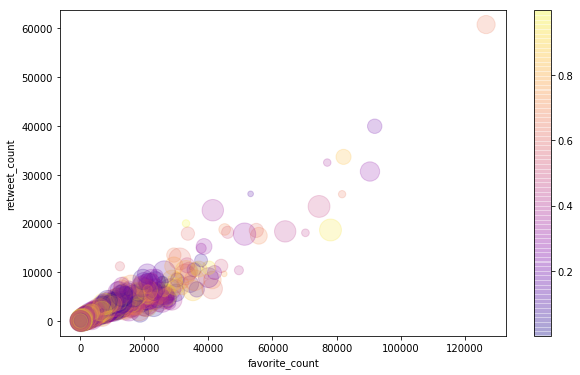

In [65]:
# make scattor plots between favorite count and retweet count
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
rng=np.random.RandomState(0)
colors=rng.rand(1084)
sizes=500*rng.rand(1084)
x1 = Analyze_df.favorite_count
y2 = Analyze_df.retweet_count
plt.figure(figsize=(10,6))
plt.scatter(x1,y2,c=colors, s=sizes,alpha=0.2,cmap='plasma')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.colorbar();
result1 = stats.pearsonr(Analyze_df.favorite_count,Analyze_df.retweet_count)
print (result1)

#### Conclusion: favorite count is highly correlated with the retweet count. Higher retweet count is associated with higher favorite count

#### Note: Since favorite count and retweet count is highly correlated with each other, I will use the favorite count for the further analyses.

#### 2.2 relationshio between favorite count and rating numerator

(0.412821459379365, 1.426641923793892e-45)


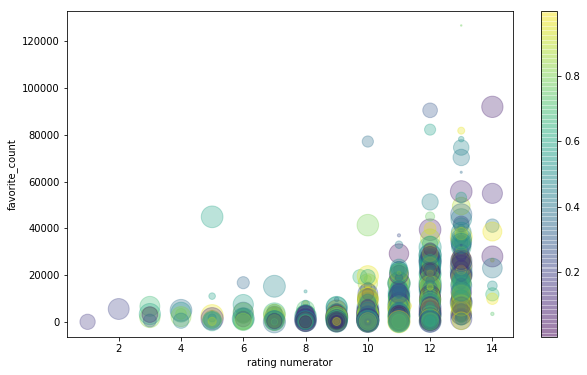

In [66]:
# make scattor plots between rating_numerator and favorite counts
# To make sure the results more accurate, I removed the rating numerator larger than 15 for this analysis
rate_df = Analyze_df[Analyze_df.rating_numerator<=15]
x = rate_df.rating_numerator
y1 = rate_df.favorite_count
colors=rng.rand(1077)
sizes=500*rng.rand(1077)
plt.figure(figsize=(10,6))
plt.scatter(x,y1,c=colors, s=sizes,alpha=0.3,cmap='viridis');
plt.xlabel('rating numerator')
plt.ylabel('favorite_count')
plt.colorbar();

# correlation between rating_numerator and favorite count
import scipy.stats as stats
result2 = stats.pearsonr(rate_df.rating_numerator,rate_df.favorite_count)
print (result2)

#### Conclusion: Overall, ratings for dogs is positively correlated with favorite count. Higher rating is associted with higher favorite count

#### Conclusion: Rating numerator is highly correlated with p1 confidence

### 3. Dog stage and dog breed

#### 3.1 favorite count and p1 confidence distribution in different dog stage

Note: since the retweet count and favorite count is highly correlated with each other, so I will just use favorite count to do the further analyses

In [67]:
# filter out the non-dog in p1_dog column
p1dog_df = Analyze_df[Analyze_df.p1_dog == True][['tweet_id','rating_numerator','p1','p1_conf','dog_stage','favorite_count','retweet_count']]
# filter out the data has no dog stage information
stage_df=p1dog_df[p1dog_df.dog_stage!='None']
stage_df.dog_stage.value_counts()

pupper     100
doggo      33 
puppo      12 
floofer    4  
Name: dog_stage, dtype: int64

Note: After this step, the sample size is significantly reduced, so this analysis is exploratory, the conclusions may not be very conclusive.

In [68]:
# calculate the mean favorite count by dog stage
stage_fav = stage_df.groupby('dog_stage')['favorite_count'].mean()
stage_fav

dog_stage
doggo      16830.545455
floofer    5609.500000 
pupper     7118.520000 
puppo      14233.583333
Name: favorite_count, dtype: float64

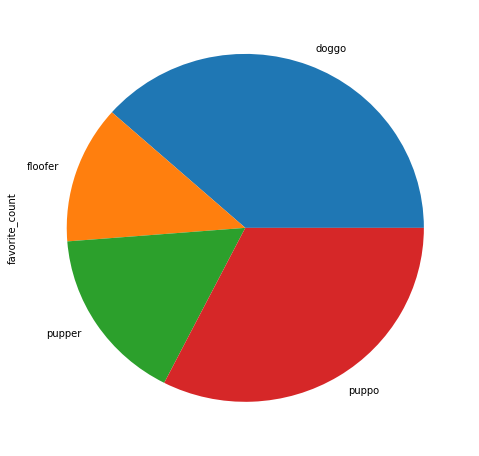

In [69]:
stage_fav.plot.pie(figsize = (8,8));

#### Conclusion: Averagely, the doggo stage dog has the highest favorite count

dog_stage
doggo      0.551993
floofer    0.494061
pupper     0.643373
puppo      0.700612
Name: p1_conf, dtype: float64


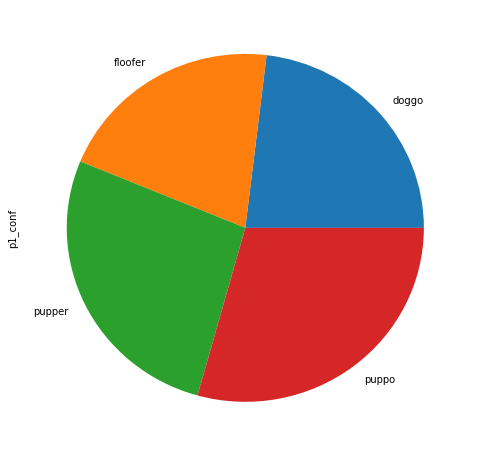

In [70]:
# calculate the mean p1 confidence by dog stage
stage_p1 = stage_df.groupby('dog_stage')['p1_conf'].mean()
print (stage_p1)
stage_p1.plot.pie(figsize = (8,8));

#### Conclusion: The distribution of the p1 confidence among these four dog stages are very similiar. But the puppo dogs has the highest p1 confidence compared to other three.

#### 3.2  Which 20 dog breed dogs have the highest favorite count

In [71]:
# filter out the dogs with favorite > 10000
highfavdog = p1dog_df[p1dog_df.favorite_count >=10000]

                             favorite_count
p1                                         
standard_poodle              91874.000000  
boxer                        55744.000000  
Chihuahua                    37286.555556  
chow                         34477.000000  
Mexican_hairless             32967.000000  
Rottweiler                   32858.000000  
giant_schnauzer              32802.000000  
Saluki                       31228.500000  
Blenheim_spaniel             31140.000000  
Pomeranian                   29548.000000  
flat-coated_retriever        28372.500000  
basset                       28289.500000  
Chesapeake_Bay_retriever     28209.500000  
Bernese_mountain_dog         27400.000000  
Irish_terrier                27232.000000  
Afghan_hound                 26268.000000  
Great_Pyrenees               25924.500000  
French_bulldog               25719.000000  
West_Highland_white_terrier  25000.000000  
Labrador_retriever           24714.285714  


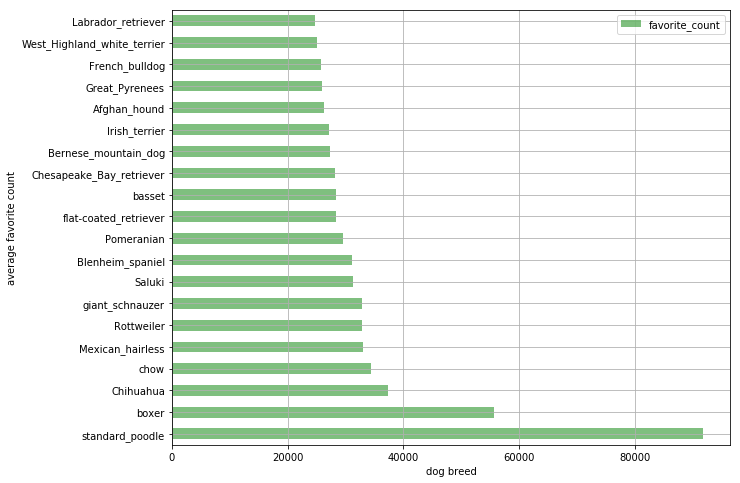

In [72]:
# calculate the mean favorite count by dog breed
fav_20 = pd.DataFrame(highfavdog.groupby('p1')['favorite_count'].mean())
fav_20= fav_20.sort_values('favorite_count',ascending = False)[0:20]
print (fav_20)
fav_20.plot(kind = 'barh',grid=True,figsize=(10,8),color = 'g', alpha = 0.5)
plt.xlabel('dog breed')
plt.ylabel('average favorite count');

#### Conclusion: Averagely, the standard_poodle has the highest facorite count

#### 3.3 Which 20 breed dog has the higest rating numerator

                                 p1_conf
p1                                      
komondor                        0.971406
Weimaraner                      0.965741
clumber                         0.946718
Brittany_spaniel                0.888837
keeshond                        0.844431
Bernese_mountain_dog            0.798474
bull_mastiff                    0.796050
Doberman                        0.786625
French_bulldog                  0.775889
Blenheim_spaniel                0.755276
basset                          0.750127
Pomeranian                      0.745132
Samoyed                         0.738466
Maltese_dog                     0.733766
German_shepherd                 0.730518
American_Staffordshire_terrier  0.729796
pug                             0.726407
golden_retriever                0.720164
Pembroke                        0.710341
Saint_Bernard                   0.694007


Text(0,0.5,'p1 confidence')

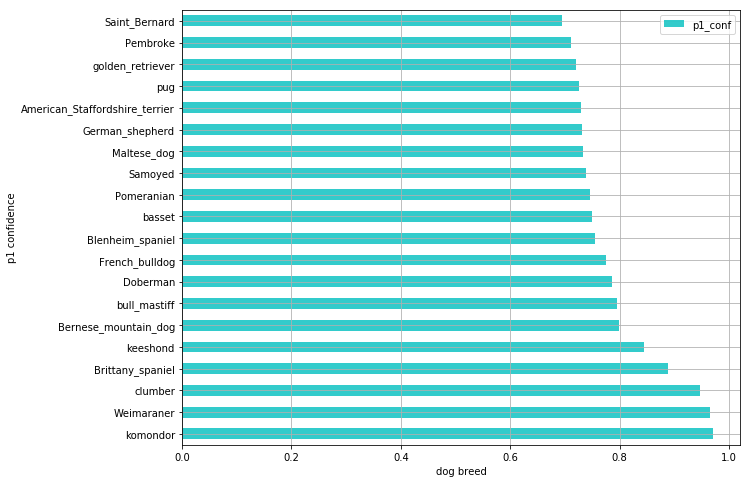

In [73]:
# calculate the mean rating numerator by dog breed
p1_20 = pd.DataFrame(p1dog_df.groupby('p1')['p1_conf'].mean())
p1_20= p1_20.sort_values('p1_conf',ascending = False)[0:20]
print (p1_20)
p1_20.plot(kind = 'barh',grid=True,figsize=(10,8),color = 'c', alpha = 0.8)
plt.xlabel('dog breed')
plt.ylabel('p1 confidence')

Conclusion: From the figure above, we can see the favorite count has been up and down since November 2015. The peak favorite count is around the end of 2016